In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Models
#SARIMAX models are a more advanced form of time series modeling that can handle both
#seasonality and exogenous variables in addition to the autoregressive and moving average components.
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

In [135]:
df = pd.read_csv("data_indvspak.csv")
espn_df=pd.read_csv("ESPN_DATA.csv")

In [65]:
espn_df.head()

,player_id,player_name_ESPN_DATA,ODI_Bat_NotOut,ODI_Highest_Bat_Inning_Score,ODI_Bat_Avg,ODI_Bat_SR,ODI_Hundred_Scored,ODI_Fifty_Scored,ODI_Boundary_Four,ODI_Boundary_Six,ODI_Bowl_Avg,ODI_Economy_Rate,ODI_Bowl_SR,ODI_4Wt_in_Inn,ODI_5Wt_in_Inn,ODI_Inn_Bat_Field
0,1,RG Sharma,36,264,48.85,110.21,30,52,928,292,64.37,5.21,74.1,0,0,243
1,2,HH Pandya,8,92,33.80,63.36,0,11,132,66,36.03,5.51,39.2,1,0,60
2,3,Shubman Gill,6,208,66.10,102.84,6,9,213,40,0.00,0.00,0.0,0,0,35
3,4,V Kohli,41,183,57.38,105.70,47,66,1226,142,166.25,6.22,160.2,0,0,269
4,5,SS Iyer,3,113,46.17,105.70,3,14,176,37,0.00,6.32,0.0,0,0,42


In [66]:
espn_df.shape

(30, 16)

In [67]:
df.shape

(2021, 10)

So we have 2021 instants and 10 columns

In [68]:
df.head(20)

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id
0,1,Rohit Sharma,DNB,-,-,1,0,23 Jun 2007,v Ireland Belfast,1
1,1,Rohit Sharma,8,0,3,1,0,26 Jun 2007,v South Africa Belfast,2
2,1,Rohit Sharma,1,-,-,0,0,5 Oct 2007,v Australia Hyderabad,3
3,1,Rohit Sharma,52,-,-,1,0,18 Nov 2007,v Pakistan Jaipur,4
4,1,Rohit Sharma,29,-,-,0,0,3 Feb 2008,v Australia Brisbane,5
5,1,Rohit Sharma,0,-,-,-,-,5 Feb 2008,v Sri Lanka Brisbane,6
6,1,Rohit Sharma,39*,-,-,1,0,10 Feb 2008,v Australia Melbourne,7
7,1,Rohit Sharma,70*,-,-,0,0,12 Feb 2008,v Sri Lanka Canberra,8
8,1,Rohit Sharma,1,-,-,1,0,17 Feb 2008,v Australia Adelaide,9
9,1,Rohit Sharma,24,-,-,0,0,19 Feb 2008,v Sri Lanka Adelaide,10


In [69]:
df.tail()

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id
2016,25,Mohammad Rizwan,75*,-,-,1,0,1 Oct 2015,v Zimbabwe Harare,470
2017,25,Mohammad Rizwan,8,-,-,0,0,3 Oct 2015,v Zimbabwe Harare,471
2018,25,Mohammad Rizwan,DNB,-,-,1,0,5 Oct 2015,v Zimbabwe Harare,472
2019,25,Mohammad Rizwan,104,-,-,0,1,29 Mar 2019,v Australia Dubai (DSC),473
2020,25,Mohammad Rizwan,12,-,-,0,0,31 Mar 2019,v Australia Dubai (DSC),474


In [70]:
#Lets see how many columns w have & their Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   player_id      2021 non-null   int64 
 1   player_name    2021 non-null   object
 2   runs_scored    2021 non-null   object
 3   wickets        2021 non-null   object
 4   runs_conceded  2021 non-null   object
 5   catches        2021 non-null   object
 6   stumpings      2021 non-null   object
 7   match_date     2021 non-null   object
 8   opposition     2021 non-null   object
 9   match_id       2021 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 158.0+ KB


**Now we have "Date" in our data set so it may be Inconsistance  data so we have to change this column to a particular format as "day,month,year" format**

In [71]:
df['match_date'] = pd.to_datetime(df['match_date'], format = '%d %b %Y')

Now Column data has been changed to a particular format also the data type should be changed so

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   player_id      2021 non-null   int64         
 1   player_name    2021 non-null   object        
 2   runs_scored    2021 non-null   object        
 3   wickets        2021 non-null   object        
 4   runs_conceded  2021 non-null   object        
 5   catches        2021 non-null   object        
 6   stumpings      2021 non-null   object        
 7   match_date     2021 non-null   datetime64[ns]
 8   opposition     2021 non-null   object        
 9   match_id       2021 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 158.0+ KB


Data type has been changed to " datetime64[ns]"




In [73]:
#lets see the data again
df.head()

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,match_date,opposition,match_id
0,1,Rohit Sharma,DNB,-,-,1,0,2007-06-23,v Ireland Belfast,1
1,1,Rohit Sharma,8,0,3,1,0,2007-06-26,v South Africa Belfast,2
2,1,Rohit Sharma,1,-,-,0,0,2007-10-05,v Australia Hyderabad,3
3,1,Rohit Sharma,52,-,-,1,0,2007-11-18,v Pakistan Jaipur,4
4,1,Rohit Sharma,29,-,-,0,0,2008-02-03,v Australia Brisbane,5


Now we have date column so it means we have **time series data** so we have to do

1.Arrange the  "match_date" column in ascending order

2.Set the "match_date" column as the index of the DataFrame

In [74]:
df = df.sort_values("match_date").set_index("match_date")

In [75]:
#lets vishualize the data
df.head()

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,opposition,match_id
match_date,,,,,,,,,
2007-06-23,1,Rohit Sharma,DNB,-,-,1,0,v Ireland Belfast,1
2007-06-26,1,Rohit Sharma,8,0,3,1,0,v South Africa Belfast,2
2007-10-05,1,Rohit Sharma,1,-,-,0,0,v Australia Hyderabad,3
2007-11-18,1,Rohit Sharma,52,-,-,1,0,v Pakistan Jaipur,4
2008-02-03,1,Rohit Sharma,29,-,-,0,0,v Australia Brisbane,5


**We can say "match_id" feature will not help us here so we can remove that**

In [76]:
#Lets see feature "match_id" values count
df['match_id'].value_counts()

245    21
247    20
246    11
452    11
457    11
       ..
355     1
286     1
285     1
284     1
371     1
Name: match_id, Length: 474, dtype: int64

In [77]:
df = df.drop(['match_id'],axis=1)

In [78]:
#lets see for opposition feature
#To see how many times our target players has played against oppositions
df['opposition'].value_counts()

v Sri Lanka Colombo (RPS)      70
v New Zealand Karachi          61
v West Indies Port of Spain    42
v Zimbabwe Harare              40
v Australia Sydney             38
                               ..
v Sri Lanka Wankhede            1
v Pakistan Mohali               1
v South Africa Nagpur           1
v Netherlands Delhi             1
v Ireland Belfast               1
Name: opposition, Length: 236, dtype: int64

Let's get the list of unique opposition team names, which can be useful for various data analysis and reporting tasks,

Unique values refer to values within a dataset or column that occur only once






In [79]:
opposition_data = df['opposition'].unique()
#Also sort the collected data to alphabetical order
opposition_data.sort()

# Create a DataFrame from the sorted unique values
opposition_df = pd.DataFrame({'Unique_Opposition': opposition_data})

In [80]:
opposition_df

,Unique_Opposition
0,v Afghanistan Abu Dhabi
1,v Afghanistan Colombo (RPS)
2,v Afghanistan Dubai (DSC)
3,v Afghanistan Hambantota
4,v Afghanistan Leeds
...,...
231,v Zimbabwe Auckland
232,v Zimbabwe Bulawayo
233,v Zimbabwe Harare
234,v Zimbabwe Lahore


Here we can see the

1.data has unconsistancy coz data in "opposition" column is in Lower case and upper case so change it

2.Also there is unwanted spaces in start and end of the data  

In [81]:
#1.
df["opposition"] = df["opposition"].str.lower()
df["opposition"] = df["opposition"].str.strip()

In [82]:
opposition_data = df['opposition'].unique()
#Also sort the collected data to alphabetical order
opposition_data.sort()

# Create a DataFrame from the sorted unique values
opposition_df = pd.DataFrame({'Unique_Opposition': opposition_data})

In [83]:
opposition_df

,Unique_Opposition
0,v afghanistan abu dhabi
1,v afghanistan colombo (rps)
2,v afghanistan dubai (dsc)
3,v afghanistan hambantota
4,v afghanistan leeds
...,...
231,v zimbabwe auckland
232,v zimbabwe bulawayo
233,v zimbabwe harare
234,v zimbabwe lahore


So now we do not need the location in "Opposition" column so we can split every instance in the "Opposition" feature and select the particular word only to feature

In [84]:
df['opposition'] = df['opposition'].str.split().str[1]

In [85]:
df.head()

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,opposition
match_date,,,,,,,,
2007-06-23,1,Rohit Sharma,DNB,-,-,1,0,ireland
2007-06-26,1,Rohit Sharma,8,0,3,1,0,south
2007-10-05,1,Rohit Sharma,1,-,-,0,0,australia
2007-11-18,1,Rohit Sharma,52,-,-,1,0,pakistan
2008-02-03,1,Rohit Sharma,29,-,-,0,0,australia


In [86]:
#so the value count also should be chnaged now
df['opposition'].value_counts()

australia      323
sri            280
new            277
west           274
england        229
south          190
bangladesh     105
zimbabwe        95
pakistan        84
afghanistan     56
india           38
netherlands     28
nepal           21
ireland          9
hong             8
u.a.e.           4
Name: opposition, dtype: int64

One more thing we have to considor that in our previous code while we splitting  "Sri Lanka has been Sri","New Zealand has been new" etc . so we have to change this

In [87]:
opposition_mapp = {'sri': 'sri lanka','new': 'new zealand','west': 'west indies','south': 'south africa','hong': 'hong kong'}

df['opposition'] = df['opposition'].replace(opposition_mapp, regex=True)


In [88]:
df.head()

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,opposition
match_date,,,,,,,,
2007-06-23,1,Rohit Sharma,DNB,-,-,1,0,ireland
2007-06-26,1,Rohit Sharma,8,0,3,1,0,south africa
2007-10-05,1,Rohit Sharma,1,-,-,0,0,australia
2007-11-18,1,Rohit Sharma,52,-,-,1,0,pakistan
2008-02-03,1,Rohit Sharma,29,-,-,0,0,australia


**Now Let's see the feature "Player_id"**




In [89]:
# We use the groupby method to group the data by 'player_id.'
# first method to get the first value in the 'player_name' column for each group unique player_id
# reset_index() to convert the result into a new DataFrame with 'player_id' and 'player_name' columns.




player_info = df.groupby('player_id')['player_name'].first().reset_index()

for player_id,player_name in player_info[['player_id', 'player_name']].values:
  print(f"Player ID: {player_id}, Player Name: {player_name}")

Player ID: 1, Player Name: Rohit Sharma
Player ID: 2, Player Name: Hardik Pandya
Player ID: 3, Player Name: Shubman Gill
Player ID: 4, Player Name: Virat Kohli
Player ID: 5, Player Name: Shreyas Iyer
Player ID: 6, Player Name: KL Rahul
Player ID: 7, Player Name: Ravindra Jadeja
Player ID: 8, Player Name: Shardul Thakur
Player ID: 9, Player Name: Jasprit Bumrah
Player ID: 10, Player Name: Mohammed Siraj
Player ID: 11, Player Name: Kuldeep Yadav
Player ID: 12, Player Name: Mohammed Shami
Player ID: 13, Player Name: Ravichandran ashwin
Player ID: 14, Player Name: Ishan Kishan
Player ID: 15, Player Name: Suryakumar Yadav
Player ID: 16, Player Name: Babar Azam
Player ID: 17, Player Name: Shadab Khan
Player ID: 18, Player Name: Abdullah Shafique
Player ID: 19, Player Name: Faqar Zaman
Player ID: 20, Player Name: Haris Rauf
Player ID: 21, Player Name: Hasan Ali
Player ID: 22, Player Name: Iftikhar Ahmed
Player ID: 23, Player Name: Imam-Ul-Haq
Player ID: 24, Player Name: Mohammad Nawaz
Player 

So we have 30 players to find the runs,wickets etc

In [90]:
df.columns

Index(['player_id', 'player_name', 'runs_scored', 'wickets', 'runs_conceded',
       'catches', 'stumpings', 'opposition'],
      dtype='object')

We haveo nly 8 columns

Our other datas contain **"-", "DNB"** in some place so we have to clean this

In [91]:
clmn= ['runs_scored', 'wickets', 'runs_conceded', 'catches', 'stumpings']
value_to_replace = '-'
df[clmn] = df[clmn].replace(value_to_replace, 0)

Only in column/feature 'runs_scored' we have "DNB,TDNB,absent" so these need to be replace by "nan"

In [92]:
values_to_replace = ['DNB', 'TDNB', 'absent']
df['runs_scored'].replace(values_to_replace, np.nan, inplace=True)

#Also we have to remove not out icon '*'
df['runs_scored'] = df['runs_scored'].str.replace('*', '')


<ipython-input-92-42a19ff48e6e>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['runs_scored'] = df['runs_scored'].str.replace('*', '')


In [93]:
df.head(10)

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,opposition
match_date,,,,,,,,
2007-06-23,1,Rohit Sharma,NaN,0,0,1,0,ireland
2007-06-26,1,Rohit Sharma,8,0,3,1,0,south africa
2007-10-05,1,Rohit Sharma,1,0,0,0,0,australia
2007-11-18,1,Rohit Sharma,52,0,0,1,0,pakistan
2008-02-03,1,Rohit Sharma,29,0,0,0,0,australia
2008-02-05,1,Rohit Sharma,0,0,0,0,0,sri lanka
2008-02-10,1,Rohit Sharma,39,0,0,1,0,australia
2008-02-12,1,Rohit Sharma,70,0,0,0,0,sri lanka
2008-02-17,1,Rohit Sharma,1,0,0,1,0,australia


In [94]:
df.tail()

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,opposition
match_date,,,,,,,,
2023-09-27,5,Shreyas Iyer,48,0,0,2,0,australia
2023-09-27,4,Virat Kohli,56,0,0,1,0,australia
2023-09-27,1,Rohit Sharma,81,0,0,0,0,australia
2023-09-27,6,KL Rahul,26,0,0,1,0,australia
2023-09-27,11,Kuldeep Yadav,2,2,48,0,0,australia


# **check missing value**

**In Basic data**

In [95]:
df.isnull().sum()

player_id          0
player_name        0
runs_scored      473
wickets            0
runs_conceded      0
catches            0
stumpings          0
opposition         0
dtype: int64

**In ESPN data**

In [96]:
espn_df.isnull().sum()

player_id                       0
player_name_ESPN_DATA           0
ODI_Bat_NotOut                  0
ODI_Highest_Bat_Inning_Score    0
ODI_Bat_Avg                     0
ODI_Bat_SR                      0
ODI_Hundred_Scored              0
ODI_Fifty_Scored                0
ODI_Boundary_Four               0
ODI_Boundary_Six                0
ODI_Bowl_Avg                    0
ODI_Economy_Rate                0
ODI_Bowl_SR                     0
ODI_4Wt_in_Inn                  0
ODI_5Wt_in_Inn                  0
ODI_Inn_Bat_Field               0
dtype: int64

# **Combine both data**

In [97]:
#merge the DataFrames based on the 'player_id' column
final_df = pd.merge(df,espn_df,on= 'player_id',how = 'left')

In [99]:
final_df.head()

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,opposition,player_name_ESPN_DATA,ODI_Bat_NotOut,...,ODI_Hundred_Scored,ODI_Fifty_Scored,ODI_Boundary_Four,ODI_Boundary_Six,ODI_Bowl_Avg,ODI_Economy_Rate,ODI_Bowl_SR,ODI_4Wt_in_Inn,ODI_5Wt_in_Inn,ODI_Inn_Bat_Field
0,1,Rohit Sharma,NaN,0,0,1,0,ireland,RG Sharma,36,...,30,52,928,292,64.37,5.21,74.1,0,0,243
1,1,Rohit Sharma,8,0,3,1,0,south africa,RG Sharma,36,...,30,52,928,292,64.37,5.21,74.1,0,0,243
2,1,Rohit Sharma,1,0,0,0,0,australia,RG Sharma,36,...,30,52,928,292,64.37,5.21,74.1,0,0,243
3,1,Rohit Sharma,52,0,0,1,0,pakistan,RG Sharma,36,...,30,52,928,292,64.37,5.21,74.1,0,0,243
4,1,Rohit Sharma,29,0,0,0,0,australia,RG Sharma,36,...,30,52,928,292,64.37,5.21,74.1,0,0,243


Change any null values & NaN

In [100]:
final_df['runs_scored'].fillna(0, inplace=True)

In [101]:
final_df.head()

,player_id,player_name,runs_scored,wickets,runs_conceded,catches,stumpings,opposition,player_name_ESPN_DATA,ODI_Bat_NotOut,...,ODI_Hundred_Scored,ODI_Fifty_Scored,ODI_Boundary_Four,ODI_Boundary_Six,ODI_Bowl_Avg,ODI_Economy_Rate,ODI_Bowl_SR,ODI_4Wt_in_Inn,ODI_5Wt_in_Inn,ODI_Inn_Bat_Field
0,1,Rohit Sharma,0,0,0,1,0,ireland,RG Sharma,36,...,30,52,928,292,64.37,5.21,74.1,0,0,243
1,1,Rohit Sharma,8,0,3,1,0,south africa,RG Sharma,36,...,30,52,928,292,64.37,5.21,74.1,0,0,243
2,1,Rohit Sharma,1,0,0,0,0,australia,RG Sharma,36,...,30,52,928,292,64.37,5.21,74.1,0,0,243
3,1,Rohit Sharma,52,0,0,1,0,pakistan,RG Sharma,36,...,30,52,928,292,64.37,5.21,74.1,0,0,243
4,1,Rohit Sharma,29,0,0,0,0,australia,RG Sharma,36,...,30,52,928,292,64.37,5.21,74.1,0,0,243


In [102]:
final_df.isnull().sum()

player_id                       0
player_name                     0
runs_scored                     0
wickets                         0
runs_conceded                   0
catches                         0
stumpings                       0
opposition                      0
player_name_ESPN_DATA           0
ODI_Bat_NotOut                  0
ODI_Highest_Bat_Inning_Score    0
ODI_Bat_Avg                     0
ODI_Bat_SR                      0
ODI_Hundred_Scored              0
ODI_Fifty_Scored                0
ODI_Boundary_Four               0
ODI_Boundary_Six                0
ODI_Bowl_Avg                    0
ODI_Economy_Rate                0
ODI_Bowl_SR                     0
ODI_4Wt_in_Inn                  0
ODI_5Wt_in_Inn                  0
ODI_Inn_Bat_Field               0
dtype: int64

# **Drop Irrelevent columns**

In [103]:
drop_features = ['player_name','player_name_ESPN_DATA','runs_conceded','stumpings','catches','opposition','ODI_Bat_NotOut']

final_df2 = final_df.drop(drop_features,axis = 1)

In [104]:
final_df2.columns

Index(['player_id', 'runs_scored', 'wickets', 'ODI_Highest_Bat_Inning_Score',
       'ODI_Bat_Avg', 'ODI_Bat_SR', 'ODI_Hundred_Scored', 'ODI_Fifty_Scored',
       'ODI_Boundary_Four', 'ODI_Boundary_Six', 'ODI_Bowl_Avg',
       'ODI_Economy_Rate', 'ODI_Bowl_SR', 'ODI_4Wt_in_Inn', 'ODI_5Wt_in_Inn',
       'ODI_Inn_Bat_Field'],
      dtype='object')

# **Lets vishualize the correlation**

<ipython-input-107-0394d535379f>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = final_df2.corr(method='pearson')


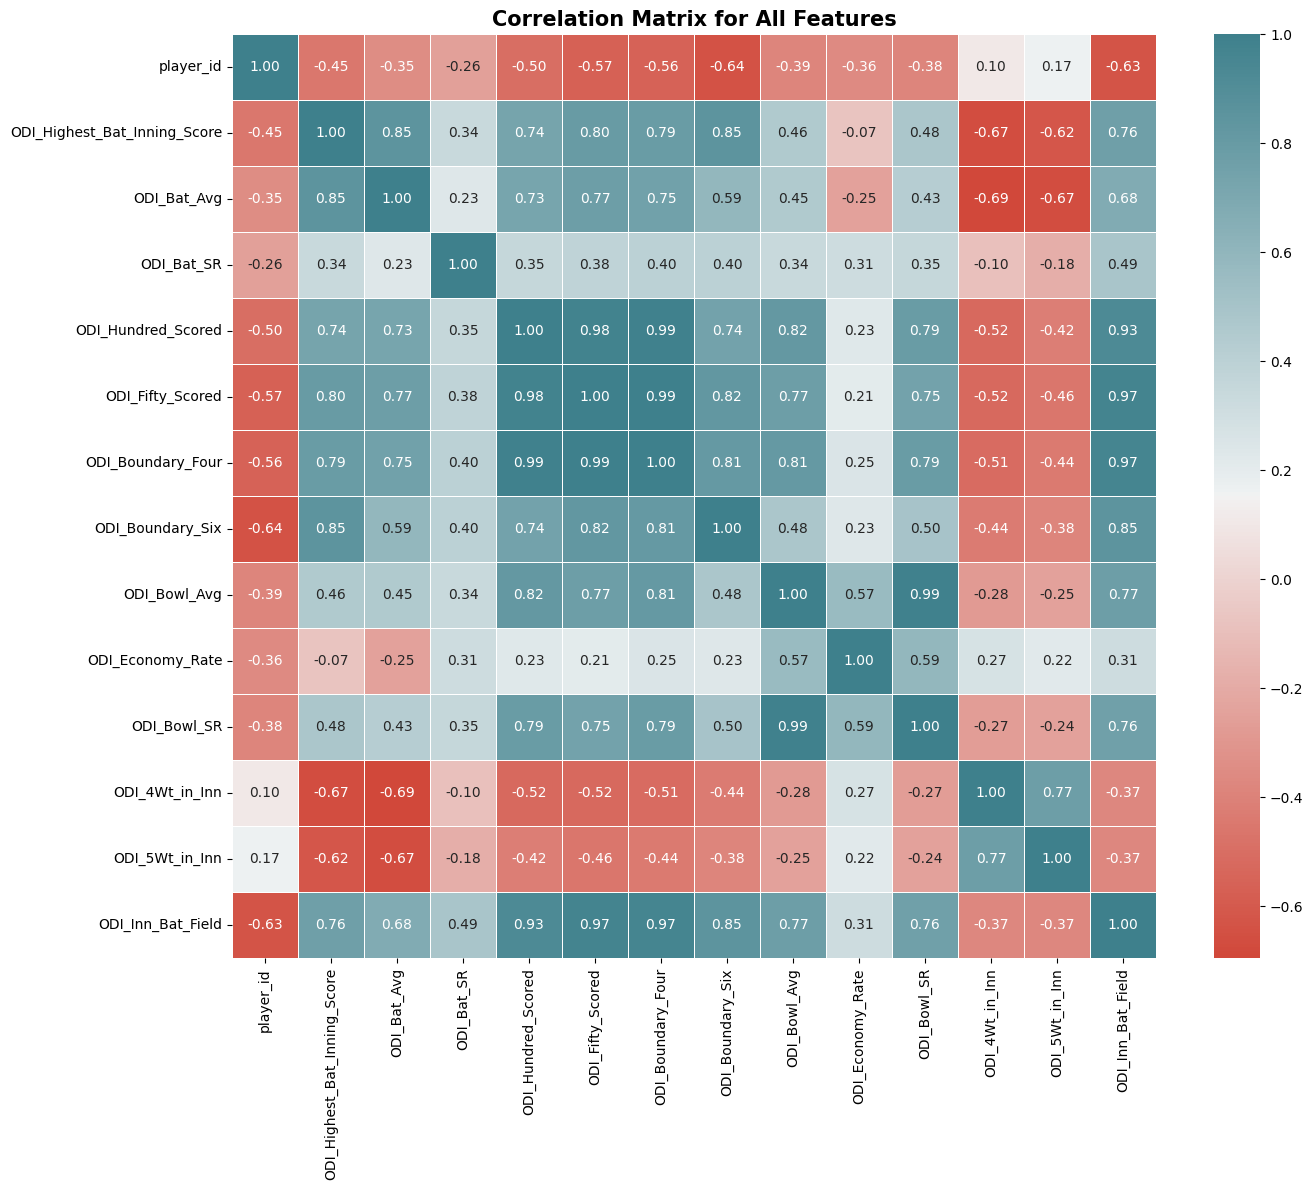

In [107]:
# Correlation matrix for all features
plt.figure(figsize=(15, 12))

#colour selection
palette=sn.diverging_palette(15, 210, n=256)

corr = final_df2.corr(method='pearson')

sn.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)

plt.title('Correlation Matrix for All Features', size=15, weight='bold');

In [110]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 0 to 2020
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   player_id                     2021 non-null   int64  
 1   runs_scored                   2021 non-null   object 
 2   wickets                       2021 non-null   object 
 3   ODI_Highest_Bat_Inning_Score  2021 non-null   int64  
 4   ODI_Bat_Avg                   2021 non-null   float64
 5   ODI_Bat_SR                    2021 non-null   float64
 6   ODI_Hundred_Scored            2021 non-null   int64  
 7   ODI_Fifty_Scored              2021 non-null   int64  
 8   ODI_Boundary_Four             2021 non-null   int64  
 9   ODI_Boundary_Six              2021 non-null   int64  
 10  ODI_Bowl_Avg                  2021 non-null   float64
 11  ODI_Economy_Rate              2021 non-null   float64
 12  ODI_Bowl_SR                   2021 non-null   float64
 13  ODI

**Runs,wickets are "object so" we should convert it to numeric data**

In [111]:
final_df2['runs_scored'] = pd.to_numeric(final_df2['runs_scored'], errors='coerce')
final_df2['wickets'] = pd.to_numeric(final_df2['wickets'], errors='coerce')

# **Let's Build the model**

# **Predict Runs**

**Building Model - Seasonal Autoregressive Integrated Moving Average (SARIMA)**

In [129]:
# Step 1- Create a Function for Predicting the Cricket Player's Run Score

def model1_runs(player_id):

    # Extract 'runs_scored' column against 'player_id' from dataframe
    player_data = final_df2[final_df2['player_id'] == player_id][['runs_scored']]

    # Split the data into training sets
    train_size = int(len(player_data) * 0.9)
    train_data = player_data[:train_size]

    ################################### Fit a SARIMA model to the training data

    #Non-Seasonal order of the SARIMA model (p, d, q)
    #Autoregressive Order(p),Differencing Order(d) and Moving Average Order(q)
    order = (1, 1, 1)

    #Seasonal Order of the SARIMA model(P, D, Q, s)
    #Seasonal Autoregressive Order(P),Seasonal Differencing Order(D)
    #Seasonal Moving Average Order(Q) & Seasonal Period of 12 (Assumed Monthly Data)
    seasonal_order = (1, 0, 0, 12)


    model = SARIMAX(train_data['runs_scored'],order=order,seasonal_order=seasonal_order)
    model_fit = model.fit()

    return model_fit



# Step 2- Define a list of player IDs for which you want to make predictions
player_ids_to_predict = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]


# Step 3- Create a dictionary to store predictions
predictions_dict = {'Player_id': [], 'RUN_SCORED': []}



# Step 4- Train SARIMA models and Make Predictions for each player
for player_id in player_ids_to_predict:

    model = model1_runs(player_id)

    # Calculate num_days_to_predict based on the specific player's data
    train_data = final_df2[final_df2['player_id'] == player_id][['runs_scored']]

    # "num_days_to_predict" value represents the number of days between the last available date
    # in the player's historical data and the target date, which is set to October 14, 2023 as we
    # need to predict performance on this date
    num_days_to_predict = (pd.to_datetime('2023-10-14') - pd.to_datetime(train_data.index[-1])).days


    # Predict for October 14, 2023
    predictions = model.forecast(steps=num_days_to_predict)

    # Handle predictions less than zero and round decimal values
    predicted_runs = max(0, predictions.iloc[-1])
    predicted_runs = round(predicted_runs)

    # Append data to the predictions_dict
    predictions_dict['Player_id'].append(player_id)
    predictions_dict['RUN_SCORED'].append(predicted_runs)

# Step 5- Create a DataFrame for the final result
result_MODEL1 = pd.DataFrame(predictions_dict)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

In [130]:
# Step 1- Create a Function for Predicting the Cricket Player's Run Score

def model2_runs(player_id):

    # Extract 'runs_scored' column against 'player_id' from dataframe
    player_data = final_df2[final_df2['player_id'] == player_id][['runs_scored']]

    # Split the data into training sets
    train_size = int(len(player_data) * 0.95)
    train_data = player_data[:train_size]

    ################################### Fit a SARIMA model to the training data

    #Non-Seasonal order of the SARIMA model (p, d, q)
    #Autoregressive Order(p),Differencing Order(d) and Moving Average Order(q)
    order = (1, 1, 1)

    #Seasonal Order of the SARIMA model(P, D, Q, s)
    #Seasonal Autoregressive Order(P),Seasonal Differencing Order(D)
    #Seasonal Moving Average Order(Q) & Seasonal Period of 12 (Assumed Monthly Data)
    seasonal_order = (0, 0, 1, 12)


    model = SARIMAX(train_data['runs_scored'],order=order,seasonal_order=seasonal_order)
    model_fit = model.fit()

    return model_fit



# Step 2- Define a list of player IDs for which you want to make predictions

player_ids_to_predict = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]


# Step 3- Create a dictionary to store predictions
predictions_dict = {'Player_id': [], 'RUN_SCORED': []}



# Step 4- Train SARIMA models and Make Predictions for each player
for player_id in player_ids_to_predict:

    model = model2_runs(player_id)

    # Calculate num_days_to_predict based on the specific player's data
    train_data = final_df2[final_df2['player_id'] == player_id][['runs_scored']]

    # "num_days_to_predict" value represents the number of days between the last available date
    # in the player's historical data and the target date, which is set to October 14, 2023 as we
    # need to predict performance on this date
    num_days_to_predict = (pd.to_datetime('2023-10-14') - pd.to_datetime(train_data.index[-1])).days


    # Predict for October 14, 2023
    predictions = model.forecast(steps=num_days_to_predict)

    # Handle predictions less than zero and round decimal values
    predicted_runs = max(0, predictions.iloc[-1])
    predicted_runs = round(predicted_runs)

    # Append data to the predictions_dict
    predictions_dict['Player_id'].append(player_id)
    predictions_dict['RUN_SCORED'].append(predicted_runs)

# Step 5- Create a DataFrame for the final result
result_MODEL2 = pd.DataFrame(predictions_dict)

print("Each player's runs scored has been predicted using Model2:-\n\n")
print('-------------'*9)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Each player's runs scored has been predicted using Model2:-


---------------------------------------------------------------------------------------------------------------------


In [131]:
# Final Prediction using Ensemble Technique
Ensemble1 = (result_MODEL1+result_MODEL2)/2
final_bat_score = (0.22*Ensemble1 + 0.78*result_MODEL1)
final_bat_score = round(final_bat_score)

In [119]:
final_bat_score

,Player_id,RUN_SCORED
0,1.0,48.0
1,2.0,25.0
2,3.0,52.0
3,4.0,50.0
4,5.0,37.0
5,6.0,43.0
6,7.0,14.0
7,8.0,7.0
8,9.0,6.0
9,10.0,1.0


# **Predict Wickets**

**Building Model 1- Seasonal Autoregressive Integrated Moving Average (SARIMA)**

In [133]:
# Step 1- Create a Function for Predicting the Cricket Player's Run Score

def model1_bowl(player_id):

    # Extract 'runs_scored' column against 'player_id' from dataframe
    player_data = final_df2[final_df2['player_id'] == player_id][['wickets']]

    # Split the data into training sets
    train_size = int(len(player_data) * 0.95)
    train_data = player_data[:train_size]

    ################################### Fit a SARIMA model to the training data

    #Non-Seasonal order of the SARIMA model (p, d, q)
    #Autoregressive Order(p),Differencing Order(d) and Moving Average Order(q)
    order = (1, 1, 1)

    #Seasonal Order of the SARIMA model(P, D, Q, s)
    #Seasonal Autoregressive Order(P),Seasonal Differencing Order(D)
    #Seasonal Moving Average Order(Q) & Seasonal Period of 12 (Assumed Monthly Data)
    seasonal_order = (0, 0, 0, 12)


    model = SARIMAX(train_data['wickets'],order=order,seasonal_order=seasonal_order)
    model_fit = model.fit()

    return model_fit



#Step 2- Define a list of player IDs for which you want to make predictions
#player_ids_to_predict = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
player_ids_to_predict = [2,7,8,9,10,11,12,13,17,20,21,22,24,26,27,29,30]


# Step 3- Create a dictionary to store predictions
predictions_dict = {'Player_id': [], 'Wickets': []}



# Step 4- Train SARIMA models and Make Predictions for each player
for player_id in player_ids_to_predict:

    model = model1_bowl(player_id)

    # Calculate num_days_to_predict based on the specific player's data
    train_data = final_df2[final_df2['player_id'] == player_id][['wickets']]

    # "num_days_to_predict" value represents the number of days between the last available date
    # in the player's historical data and the target date, which is set to October 14, 2023 as we
    # need to predict performance on this date
    num_days_to_predict = (pd.to_datetime('2023-10-14') - pd.to_datetime(train_data.index[-1])).days


    # Predict for October 14, 2023
    predictions = model.forecast(steps=num_days_to_predict)

    # Handle predictions less than zero and round decimal values
    predicted_wickets = max(0, predictions.iloc[-1])
    predicted_wickets = round(predicted_wickets)

    # Append data to the predictions_dict
    predictions_dict['Player_id'].append(player_id)
    predictions_dict['Wickets'].append(predicted_wickets)

# Step 5- Create a DataFrame for the final result
bowl_pred_MODEL1 = pd.DataFrame(predictions_dict)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In t

In [134]:
# Step 1- Create a Function for Predicting the Cricket Player's Run Score

def model2_bowl(player_id):

    # Extract 'runs_scored' column against 'player_id' from dataframe
    player_data = final_df2[final_df2['player_id'] == player_id][['wickets']]

    # Split the data into training sets
    train_size = int(len(player_data) * 0.95)
    train_data = player_data[:train_size]

    ################################### Fit a SARIMA model to the training data

    #Non-Seasonal order of the SARIMA model (p, d, q)
    #Autoregressive Order(p),Differencing Order(d) and Moving Average Order(q)
    order = (1, 1, 1)

    #Seasonal Order of the SARIMA model(P, D, Q, s)
    #Seasonal Autoregressive Order(P),Seasonal Differencing Order(D)
    #Seasonal Moving Average Order(Q) & Seasonal Period of 12 (Assumed Monthly Data)
    seasonal_order = (0, 0, 1, 12)


    model = SARIMAX(train_data['wickets'],order=order,seasonal_order=seasonal_order)
    model_fit = model.fit()

    return model_fit



# Step 2- Define a list of player IDs for which you want to make predictions
#player_ids_to_predict = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
player_ids_to_predict = [2,7,8,9,10,11,12,13,17,20,21,22,24,26,27,29,30]


# Step 3- Create a dictionary to store predictions
predictions_dict = {'Player_id': [], 'Wickets': []}



# Step 4- Train SARIMA models and Make Predictions for each player
for player_id in player_ids_to_predict:

    model = model2_bowl(player_id)

    # Calculate num_days_to_predict based on the specific player's data
    train_data = final_df2[final_df2['player_id'] == player_id][['wickets']]

    # "num_days_to_predict" value represents the number of days between the last available date
    # in the player's historical data and the target date, which is set to October 14, 2023 as we
    # need to predict performance on this date
    num_days_to_predict = (pd.to_datetime('2023-10-14') - pd.to_datetime(train_data.index[-1])).days


    # Predict for October 14, 2023
    predictions = model.forecast(steps=num_days_to_predict)

    # Handle predictions less than zero and round decimal values
    predicted_wickets = max(0, predictions.iloc[-1])
    predicted_wickets = round(predicted_wickets)

    # Append data to the predictions_dict
    predictions_dict['Player_id'].append(player_id)
    predictions_dict['Wickets'].append(predicted_wickets)

# Step 5- Create a DataFrame for the final result
bowl_pred_MODEL2 = pd.DataFrame(predictions_dict)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In t

In [123]:
# Final Prediction using Ensemble Technique
final_bowl_score = (0.65*bowl_pred_MODEL1+0.35*bowl_pred_MODEL2)
final_bowl_score = round(final_bowl_score)

In [136]:
final_bowl_score

,Player_id,Wickets
0,2.0,1.0
1,7.0,1.0
2,8.0,1.0
3,9.0,2.0
4,10.0,0.0
5,11.0,2.0
6,12.0,2.0
7,13.0,1.0
8,17.0,1.0
9,20.0,2.0
